# IRISデータでATDの練習

## こちらで紹介されてたのでやってみる

[Toying with Topological Data Analysis - Part 1 (IRIS)](https://dreamtolearn.com/ryan/data_analytics_viz/47)

ソースはそのサイトの中からリンクされている。これを少しずつ追いかける。

phom というパッケージが必要だが、R のパッケージから外れているので、
[CRAN phom](https://cran.r-project.org/web/packages/phom/index.html)

アーカイブをダウンロードして、Rにインストールしておく。

In [1]:
# まず準備
############################################
## Toying with Topological Data Analysis  ##
## Testing on IRIS Mythica - 200 samples  ##
## four types (3 standard + 1 fabricated) ##
## R. Anderson March 2014                 ##
############################################
library(diffusionMap)
library(randomForest)
library(ggplot2)
library(reshape2)  ## here is where we do a 'pivot table'
library(plyr)
library(phom)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: Rcpp


## とりあえずここから
データ読み込みと、散布図での表示。データには mythica 種が入って４種類になっているデータを利用している。
このCSVは適当に入手して、どこかに置いておく。

In [7]:
setwd("~/knime-workspace/dreamtolearn TDA")
iris = read.csv("iris_Mythica.csv") 
## this iris set changed the species to 1,2,3,4 
## or first letter) - doesn not handle strings eg "setosa" 
##  you can also use the original iris 150 set if you change Species to a number or letter
head(iris) # s=setosa; v=virginica; e=versicolor; m=mythica
summary(iris)

,Index,sepal.length,sepal.width,petal.length,petal.width,class
1,1,5.1,3.5,1.4,0.2,setosa
2,2,4.9,3,1.4,0.2,setosa
3,3,4.7,3.2,1.3,0.2,setosa
4,4,4.6,3.1,1.5,0.2,setosa
5,5,5,3.6,1.4,0.2,setosa
6,6,5.4,3.9,1.7,0.4,setosa


     Index         sepal.length    sepal.width     petal.length  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 50.75   1st Qu.:5.400   1st Qu.:2.900   1st Qu.:1.700  
 Median :100.50   Median :6.100   Median :3.100   Median :3.395  
 Mean   :100.50   Mean   :5.987   Mean   :3.154   Mean   :3.427  
 3rd Qu.:150.25   3rd Qu.:6.500   3rd Qu.:3.433   3rd Qu.:4.900  
 Max.   :200.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  petal.width            class   
 Min.   :0.1000   mythica   :50  
 1st Qu.:0.5175   setosa    :50  
 Median :0.9850   versicolor:50  
 Mean   :1.0783   virginica :50  
 3rd Qu.:1.6000                  
 Max.   :2.5000                  

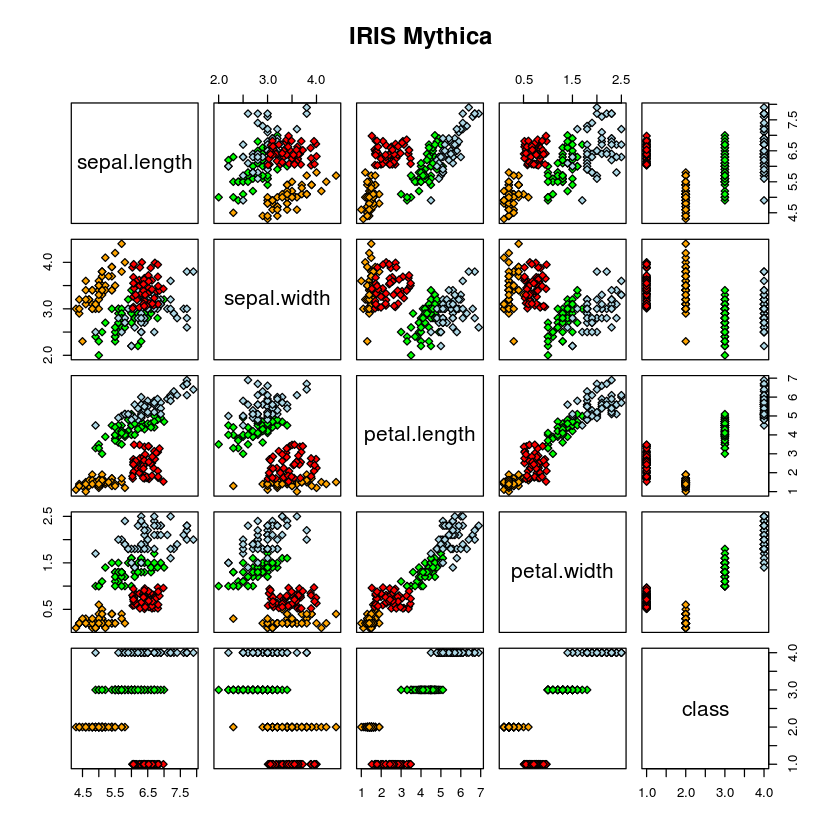

In [14]:
# 散布図
## what we are starting with
plot(iris[2:6], main="IRIS Mythica", pch=23, bg = c("red","orange","green", "lightblue")
     [unclass(iris$class)])

## ざっくり diffusion map で見てみる

diffusion map は、次元削減をしてくれる。

Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.021 seconds


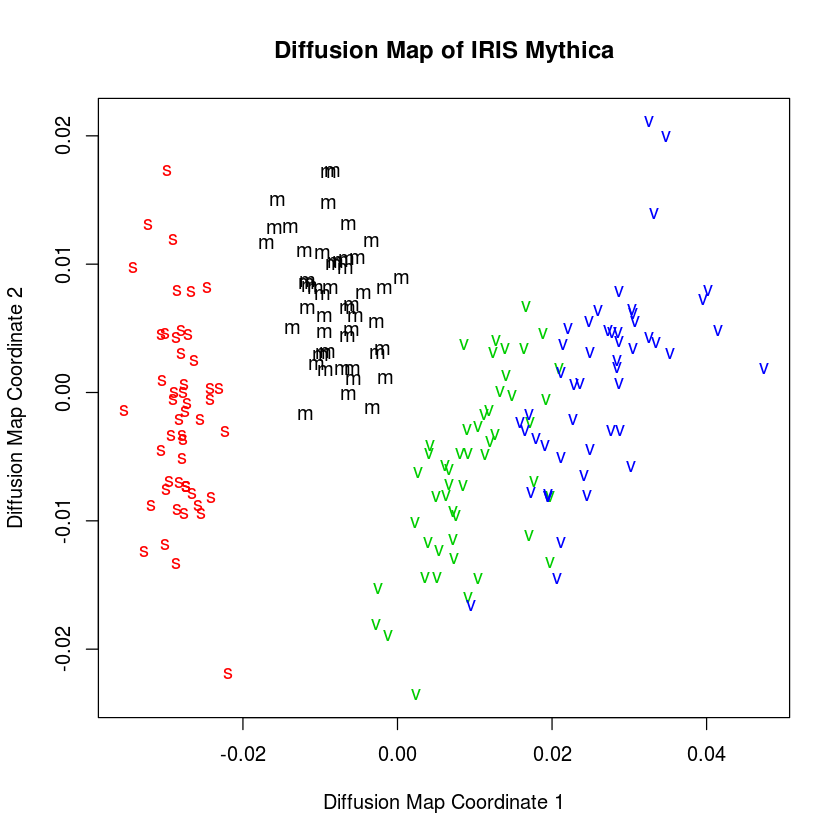

In [12]:
data <- iris[2:5] ## let's learn off 2,3,4,5 columns, first column is index
species <- iris$class ## and species is our target and classifier 

D = dist(scale(data)) # use Euclidean distance on data
## DIST: This function computes and returns the distance matrix computed by using the specified distance measure to compute the distances between the rows of a data matrix.

dmap = diffuse(D,eps.val=250, t=1, neigen=2)
## diffuse: Uses the pair-wise distance matrix for a data set to compute the diffusion map coefficients. Computes the Markov transition probability matrix, and its eigenvalues and left & right eigenvectors. Returns a 'dmap' object.
#eps = 250 and t=1 and neigen = 2 is nice

## PLOT 2
## if this works, you should see clouds of S,M,V and i (or 1,2,3,4) - whatever you had for species tag
plot(dmap$X[,1],dmap$X[,2],col=species,pch=paste(species), 
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2",
     main="Diffusion Map of IRIS Mythica")

ちょっと DIFFUSE の設定を変えてみる。

Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.112 seconds


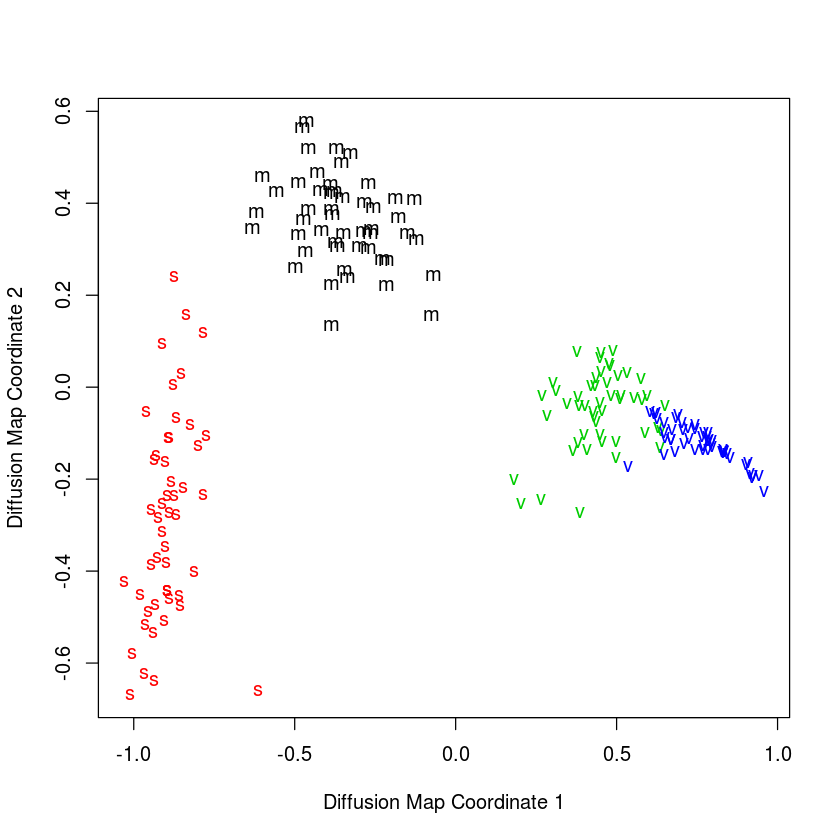

In [13]:
# edit DIFFUSE variable values - what changes? 
dmap = diffuse(D,eps.val=3, t=2, neigen=3) 
plot(dmap$X[,1],dmap$X[,2],col=species,pch=paste(species), 
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2")

## 分類一回目
この状態で、RandomForest をやってみる。


Call:
 randomForest(x = data, y = species, ntree = 100, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.5%
Confusion matrix:
           mythica setosa versicolor virginica class.error
mythica         50      0          0         0        0.00
setosa           1     49          0         0        0.02
versicolor       0      0         47         3        0.06
virginica        0      0          3        47        0.06


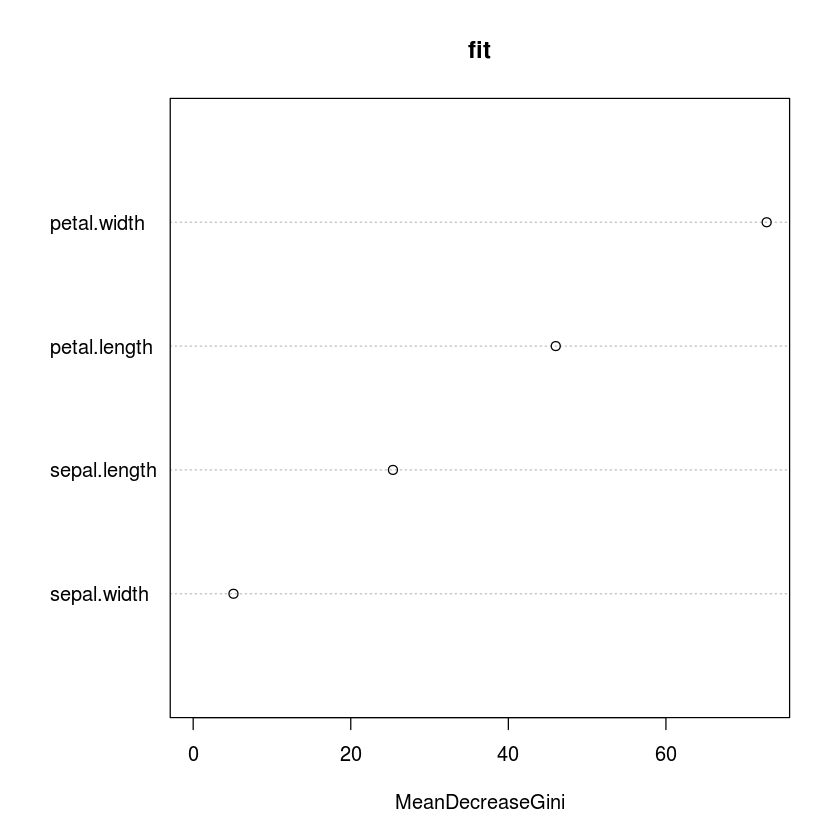

In [15]:
# 2) OK - now Use random forest "Department" classifier to define distances

fit = randomForest(data, species, ntree=100, proximity=TRUE) 
print(fit)
varImpPlot(fit)

random forest のダイアグラム

Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.026 seconds


-0.813682219646157,0.546267887361028
-0.810754467560329,0.548088895362461
-0.808220910095367,0.545625776214393
-0.811509445746496,0.545167494938242
-0.816810885227688,0.550012431230843
-0.805017485674218,0.545623214625183
-0.809735784634501,0.547943538968406
-0.813767834870368,0.548087122775807
-0.800171850431522,0.531921401425698
-0.812349666684137,0.546827209539774
-0.813922498674638,0.546986211989385


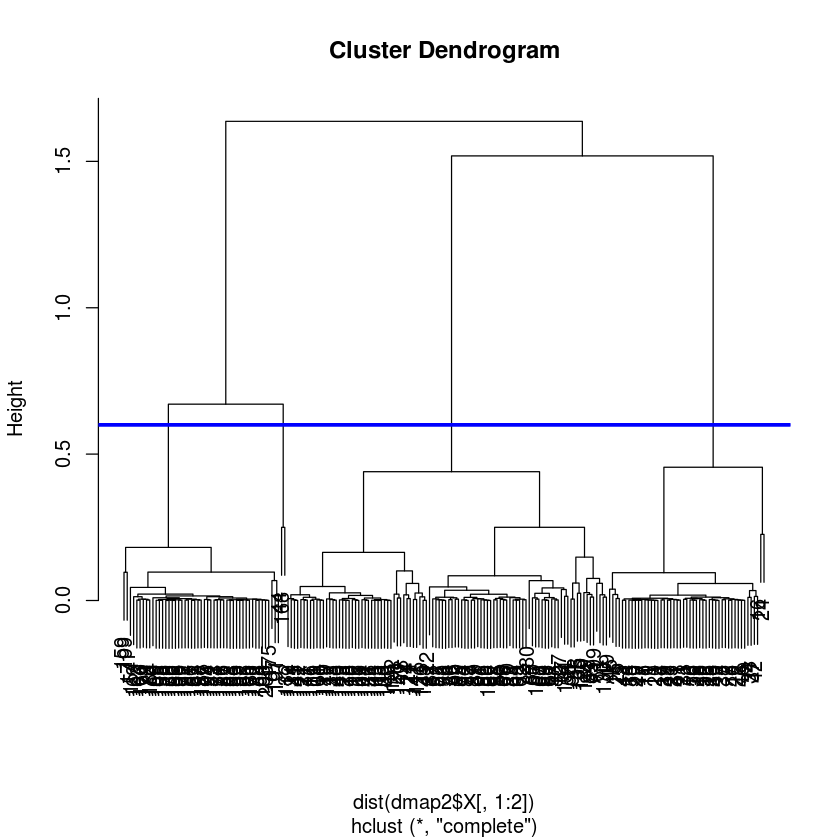

In [16]:
# PLOT 3
#version
D2 = 1-fit$proximity # use 1 - proximity
dmap2 = diffuse(D2,eps.val=.5, t=1, neigen=2)   #original dmap1 = diffuse(D1,eps.val=.1, t=1, neigen=2)
head(dmap2)

cluster2 = hclust(dist(dmap2$X[,1:2]))
plot(cluster2); abline(h=.6, col='blue',lwd=3)

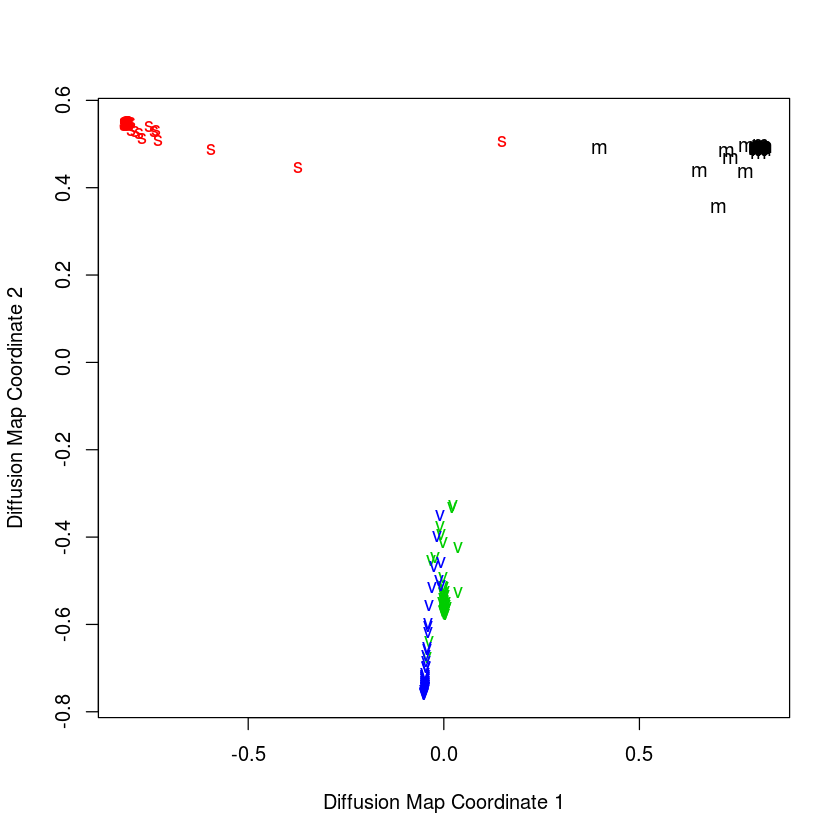

In [17]:
## PLOT 5

plot(dmap2$X[,1],dmap2$X[,2],col=species,pch=paste(species), 
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2")

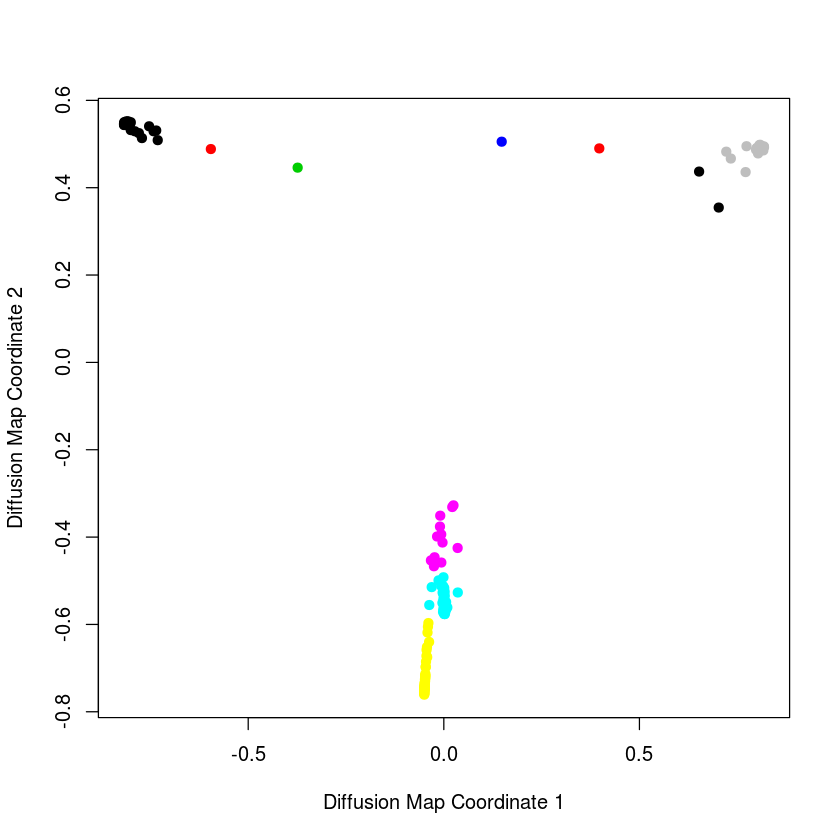

In [18]:
## clustering variable 4 (Plot 7) vs 10 is interesting
## depends what you want to output
clustering2 = cutree(cluster2,k=10)  ## this is how many nodes there are
#clustering2

plot(dmap2$X[,1],dmap2$X[,2],col=clustering2, pch=19,
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2")

いったんセーブ。

In [ ]:
## See plot 8 - note number of 'buckets' 

output2 = data.frame(dmap2$X,species,clustering2)
#output2

write.csv(output2,"TDA_export_data2.csv") 

仕切りなおすみたい。

In [27]:
iris3 = read.csv("iris_Mythica.csv") 
data3 <- iris[2:5] ## let's learn off 4 columns skip 1st
species3 <- iris$class ## and species is our target

random forest やってみる。

In [28]:
fit3 = randomForest(data3, species3, ntree=100, proximity=TRUE) 

Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.026 seconds


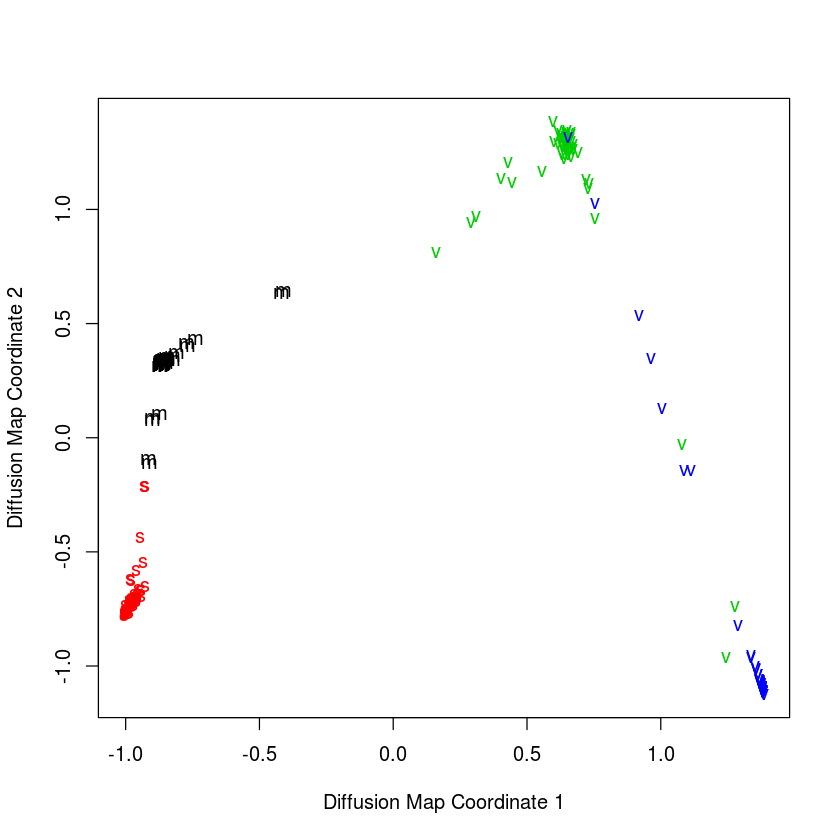

In [29]:
D3 = 1./fit3$proximity - 1. # use 1/proximity - 1
dmap3 = diffuse(D3,eps.val=80, t=1, neigen=2) 
plot(dmap3$X[,1],dmap3$X[,2],col=species3,pch=paste(species3), 
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2")
## using RF method we generate  plot similar to plot 6 (but better focus)

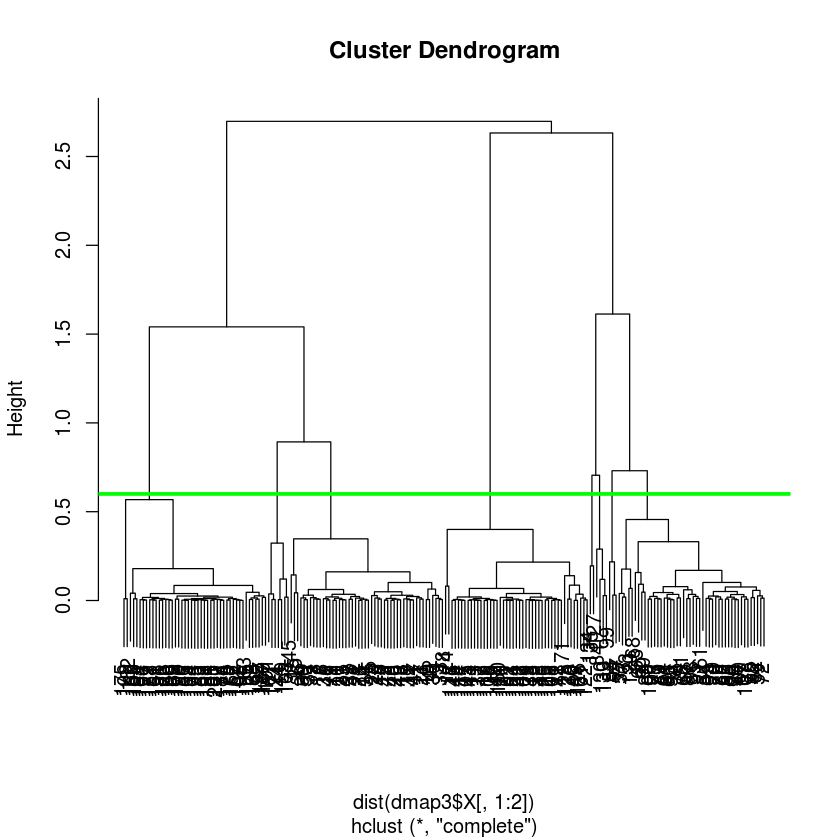

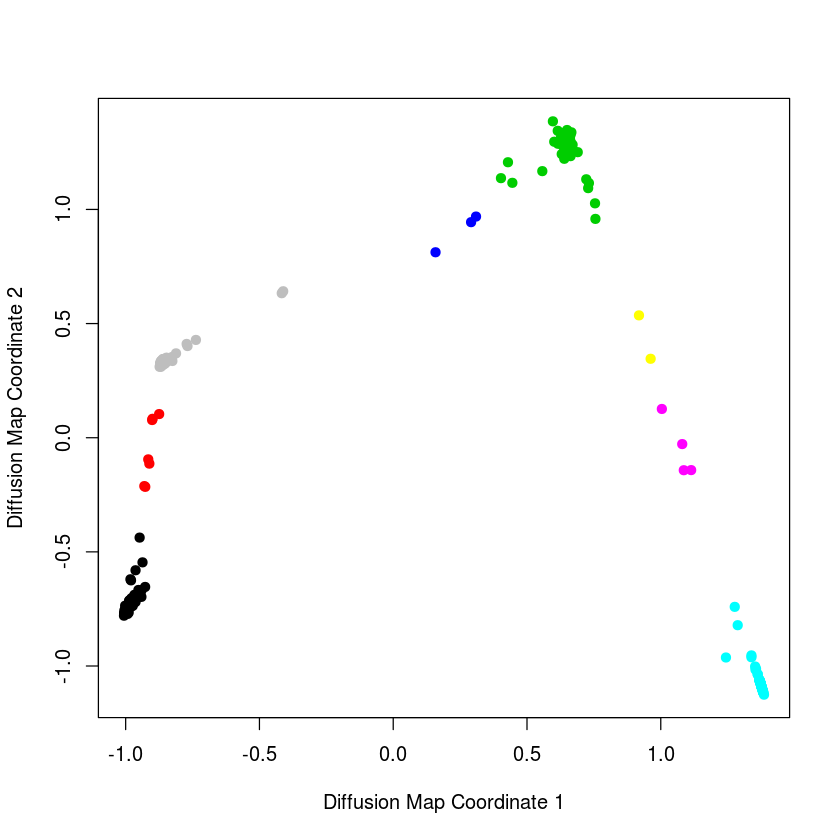

In [31]:
cluster3 = hclust(dist(dmap3$X[,1:2]))
plot(cluster3); abline(h=.6, col='green',lwd=3)
clustering3 = cutree(cluster3,k=8)  ## this is how many nodes there are
#clustering3

plot(dmap3$X[,1],dmap3$X[,2],col=clustering3, pch=19,
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2")
## Plot 8
#### Nice - this looks like somehting we can stitch together and ascribe weight to - 

In [ ]:
# このあたりはよくわからないので、実行しなくていい
data <- melt(output3, measure = "clustering3", id = c("species3","clustering3"))
data

print(cast(data, species3 ~ ., sum)) ## useful to show pivot, but not valid add
gold <- print(cast(data, clustering3 ~ ., sum )) ## add up ( so need to divide by bin size)
colnames(gold)[1] <- "cluster"
colnames(gold)[2] <- "weight"
gold[2] = gold[2]/gold[1]  ## need to do this because our pivot gave us SUM, not count (i dont know how to do that)
gold ## ok - we have cluster list, and count (size of ball)
gold[3] = gold[1]+1
colnames(gold)[3] <- "join.to"
gold
### the 8 lines above are probably not the best way to distil information, but best available (room for improvement)
## future: consider a function to modify then export to JSON for D3 consumtion

## ok, let's export this bad boy and see what it looks like in D3 or Google Fusion
write.csv(gold,"TDA_export_data3.csv") 

Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.111 seconds


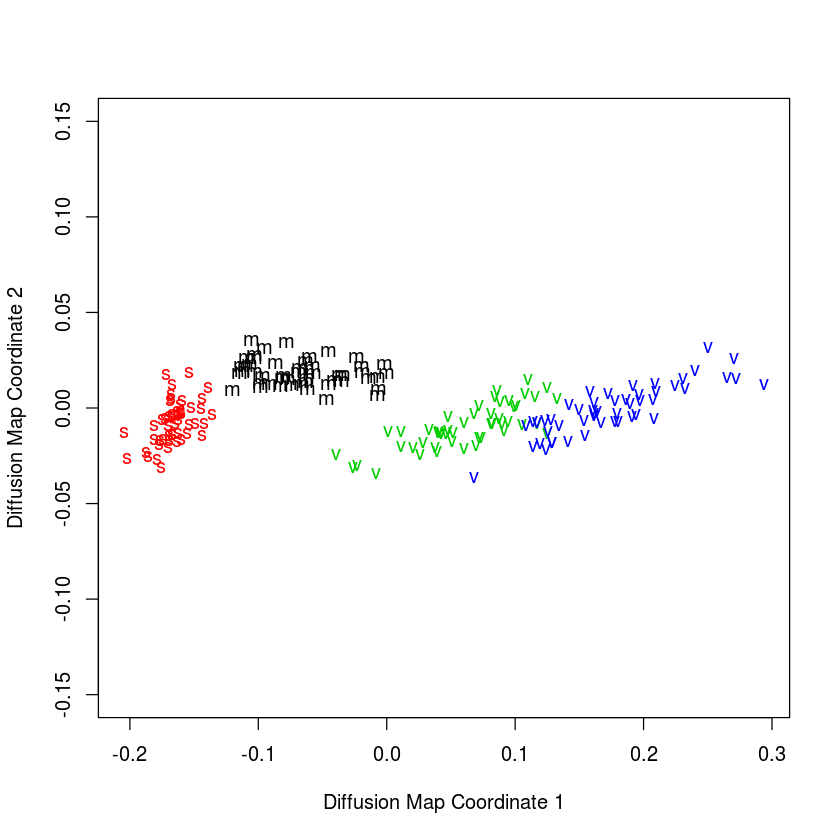

In [33]:
# 4) using smoothed histograms
D4 = dist(data)
# dmap4 = diffuse(D4,eps.val=50, t=1, neigen=2)  # works pretty good with iris mythica
dmap4 = diffuse(D4,eps.val=50, t=1, neigen=2) 

plot(dmap4$X[,1],dmap4$X[,2],col=species,pch=paste(species), 
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2", ylim=c(-0.15,0.15))


Call:
 randomForest(x = data, y = species, ntree = 1000, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.5%
Confusion matrix:
           mythica setosa versicolor virginica class.error
mythica         50      0          0         0        0.00
setosa           0     50          0         0        0.00
versicolor       0      0         47         3        0.06
virginica        0      0          4        46        0.08
Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.028 seconds


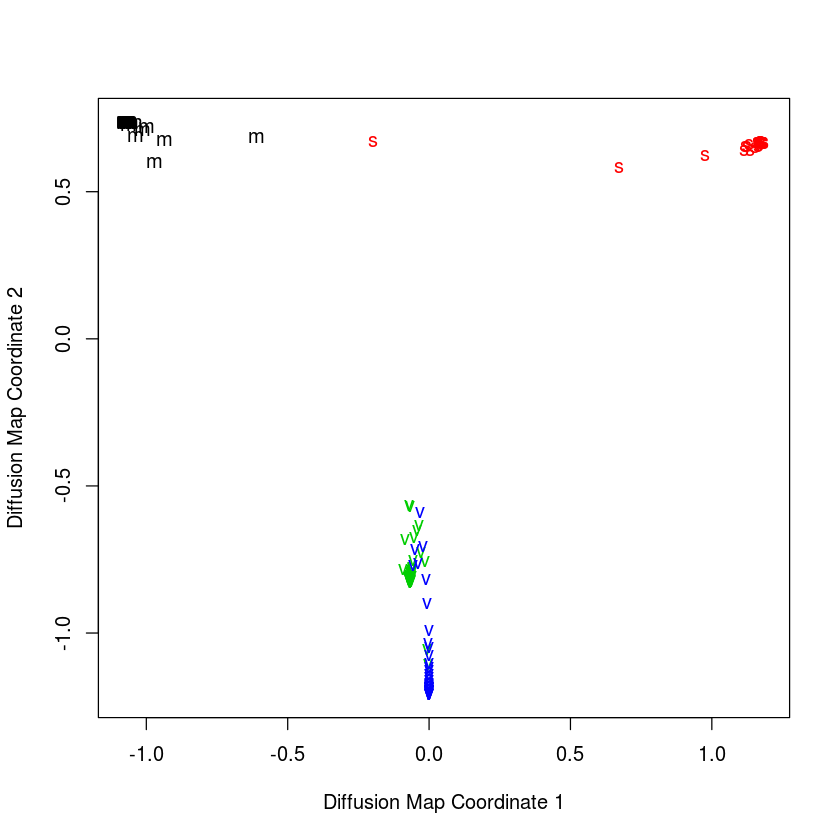

In [35]:
# fit RF on smoothed histograms
fit4 = randomForest(data, species, ntree=1000, proximity=TRUE)
print(fit4)

D4 = 1-fit$proximity # use 1 - proximity
dmap4 = diffuse(D4,eps.val=0.3, t=1, neigen=2) 
plot(dmap4$X[,1],dmap4$X[,2],col=species,pch=paste(species), 
     xlab="Diffusion Map Coordinate 1", 
     ylab="Diffusion Map Coordinate 2")
## see plot 6

## ここから、pHom

In [47]:
########## some pHO for good measure
### Source http://blog.revolutionanalytics.com/2014/01/topological-data-analysis-with-r.html 
## (5) Betti where are you? - See Plot 4
data5 <- as.matrix(iris[,2:5])
dim(data5)
head(data5)

[1] 200   4

sepal.length,sepal.width,petal.length,petal.width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


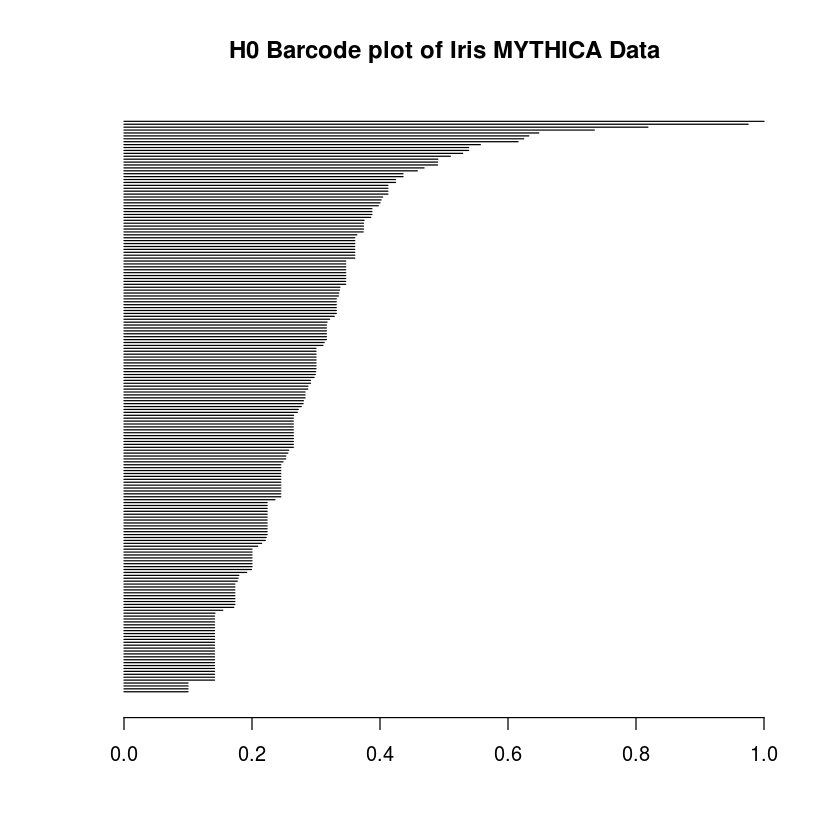

In [48]:
max_dim <- 0
max_f <- 1
irisInt0 <- pHom(data5, 
                 dimension=max_dim,              # maximum dimension of persistent homology computed
                 max_filtration_value=max_f,     # maximum dimension of filtration complex
                 mode="vr",                      # type of filtration complex
                 metric="euclidean")

plotBarcodeDiagram(irisInt0, max_dim, max_f, title="H0 Barcode plot of Iris MYTHICA Data")
# Plot 4
